In [6]:
# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
sns.set_style('whitegrid')
%matplotlib notebook

## Make test data

In [49]:
x = np.linspace(0, 10)
y = 2*x + 1 + 4*np.random.rand(50)
for i in [3,15,23,49]:
    y[i] += 10*np.random.randn()

In [56]:
df = pd.DataFrame({'x': x, 'y': y})

In [55]:
pd.DataFrame({'x': x, 'y': y}).to_csv(
    'sample_linear_regression.csv', index=False, header=True)

In [67]:
df.head()

x         y
0  0.000000  3.926756
1  0.204082  4.062068
2  0.408163  3.636059
3  0.612245 -2.014204
4  0.816327  6.193156

<IPython.core.display.Javascript object>


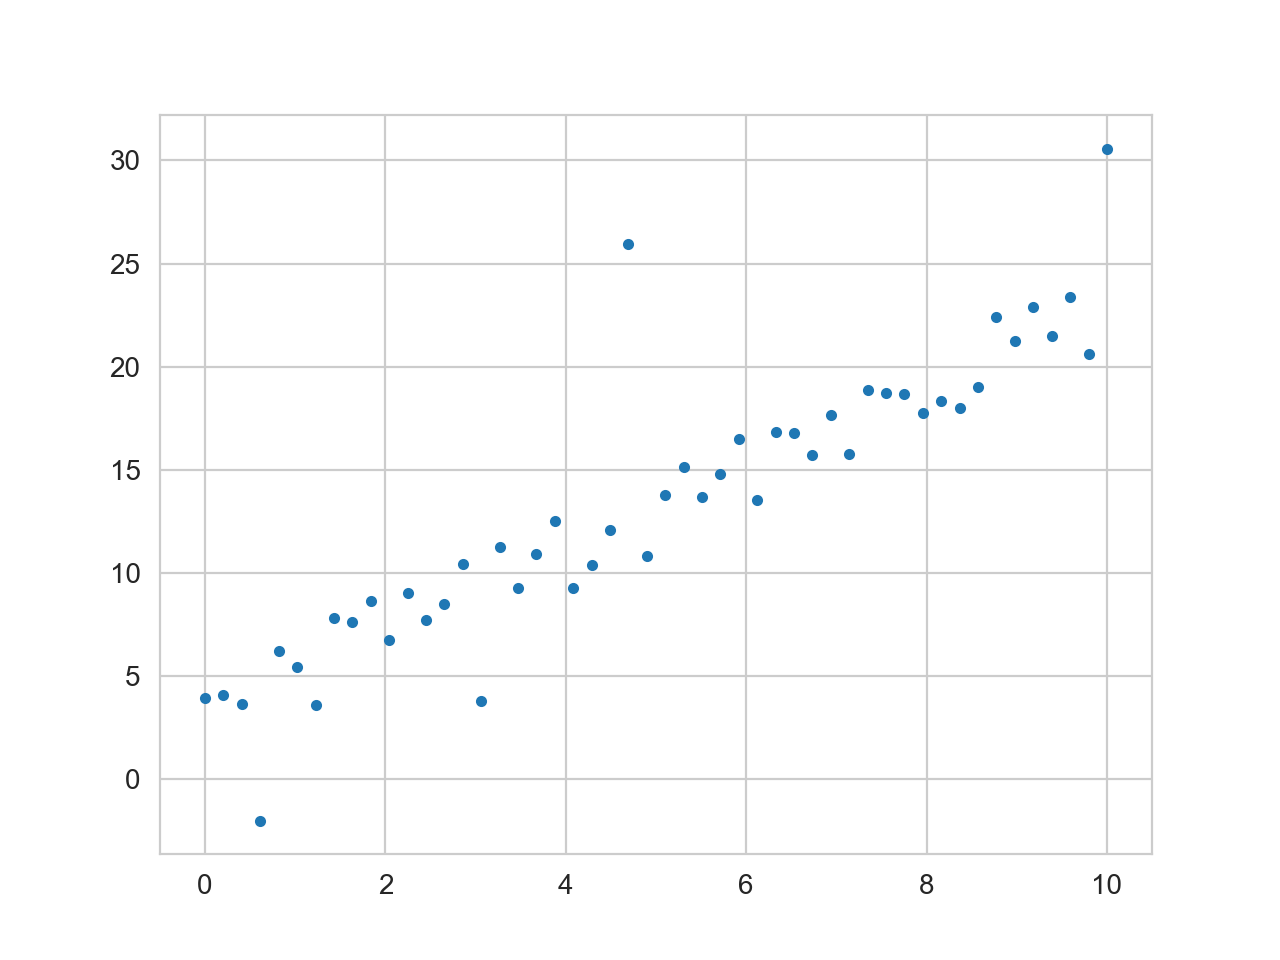

In [50]:
plt.plot(x,y,'.')

## Navigating Results

### Individual run

In [117]:
import mlflow


def yield_artifacts(run_id, path=None):
    """Yield all artifacts in the specified run"""
    client = mlflow.tracking.MlflowClient()
    for item in client.list_artifacts(run_id, path):
        if item.is_dir:
            yield from yield_artifacts(run_id, item.path)
        else:
            yield item.path


def fetch_logged_data(run_id):
    """Fetch params, metrics, tags, and artifacts in the specified run"""
    client = mlflow.tracking.MlflowClient()
    data = client.get_run(run_id).data
    # Exclude system tags: https://www.mlflow.org/docs/latest/tracking.html#system-tags
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = list(yield_artifacts(run_id))
    return {
        "params": data.params,
        "metrics": data.metrics,
        "tags": tags,
        "artifacts": artifacts,
    }

In [133]:
import os

In [157]:
#Navigate to repo that contains mlruns/
os.chdir('/Users/sugreevchawla/Desktop/repos/sugreev_work/scripts/template')

//anaconda3/envs/sklearn/lib/python3.9/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
fetch_logged_data('f46a708f67b94f44982213931eeadc66')

{'params': {'thresh': '4'},
 'metrics': {'r2': 0.8581894524035087, 'rmse': 1.088793076372334},
 'tags': {'outlier_method': 'threshold'},
 'artifacts': ['cleaned_linear_regression.csv',
  'sk_models/MLmodel',
  'sk_models/conda.yaml',
  'sk_models/model.pkl']}

In [160]:
# show logged data
from pprint import pprint
for key, data in fetch_logged_data('f46a708f67b94f44982213931eeadc66').items():
    print("\n---------- logged {} ----------".format(key))
    pprint(data)


---------- logged params ----------
{'thresh': '4'}

---------- logged metrics ----------
{'r2': 0.8581894524035087, 'rmse': 1.088793076372334}

---------- logged tags ----------
{'outlier_method': 'threshold'}

---------- logged artifacts ----------
['cleaned_linear_regression.csv',
 'sk_models/MLmodel',
 'sk_models/conda.yaml',
 'sk_models/model.pkl']


### Search Runs
(No artifacts)

In [165]:
df = mlflow.search_runs(experiment_ids='2')
df

//anaconda3/envs/sklearn/lib/python3.9/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


run_id experiment_id    status  \
0   aad89458f2c14931b7e7a826cfc22347             2  FINISHED   
1   025f7cdce4bd4022b3374e9305ec52c2             2  FINISHED   
2   d10bf0fc7c804ec99fa11d81a31cb9be             2  FINISHED   
3   6634f72da142499eb9465981e04246bf             2  FINISHED   
4   ecf5d2901cea45dcaa62406e04d1df87             2  FINISHED   
5   288debf1e6a44ac291e49bdea24f2175             2  FINISHED   
6   7dade7ae083a4c268cbdb91d537c5a19             2  FINISHED   
7   d66b1f52d77f44ddb7ad1957995ee5ff             2  FINISHED   
8   71c12f612f4c40918414218cedc4e762             2  FINISHED   
9   b7ceb0080ddc4e8788fc8ee2649d8ad9             2  FINISHED   
10  217e15af7e6742f9bb7641600d929f5d             2  FINISHED   
11  78839b4502834a7d900c4ad4f246e84a             2  FINISHED   
12  2e2b5020664a4451a44682d8be4d9dbc             2  FINISHED   
13  4a22ba6c83094e879a7eccea91ea4c47             2  FINISHED   

                                         artifact_uri  metrics.n_removed  \
0   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
1   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
2   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
3   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
4   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
5   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
6   file:///Users/sugreevchawla/Desktop/repos/sugr...                2.0   
7   file:///Users/sugreevchawla/Desktop/repos/sugr...                3.0   
8   file:///Users/sugreevchawla/Desktop/repos/sugr...                3.0   
9   file:///Users/sugreevchawla/Desktop/repos/sugr...                4.0   
10  file:///Users/sugreevchawla/Desktop/repos/sugr...                4.0   
11  file:///Users/sugreevchawla/Desktop/repos/sugr...               14.0   
12  file:///Users/sugreevchawla/Desktop/repos/sugr...               22.0   
13  file:///Users/sugreevchawla/Desktop/repos/sugr...               35.0   

    metrics.rmse  metrics.r2 params.thresh tags.outlier_method  \
0       1.448889    0.927787            14           threshold   
1       1.448889    0.927787            13           threshold   
2       1.448889    0.927787            12           threshold   
3       1.402916    0.950466            11           threshold   
4       1.402916    0.950466            10           threshold   
5       1.402916    0.950466             9           threshold   
6       1.215717    0.836540             8           threshold   
7       1.444215    0.778797             7           threshold   
8       1.444215    0.778797             6           threshold   
9       1.088793    0.858189             5           threshold   
10      1.088793    0.858189             4           threshold   
11      0.992327    0.946731             3           threshold   
12      0.780892    0.980498             2           threshold   
13      0.258825    0.952370             1           threshold   

   tags.mlflow.source.name tags.mlflow.source.type tags.mlflow.user  \
0    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
1    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
2    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
3    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
4    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
5    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
6    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
7    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
8    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
9    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
10   main_mlflow_tuning.py                   LOCAL    sugreevchawla   
11   main_mlflow_tuning.py                   LOCAL    sugreevchawla   
12   main_mlfl

In [166]:
filt = df['metrics.n_removed'] <=4 
df[filt].sort_values('metrics.r2', ascending=False)

//anaconda3/envs/sklearn/lib/python3.9/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


run_id experiment_id    status  \
3   6634f72da142499eb9465981e04246bf             2  FINISHED   
4   ecf5d2901cea45dcaa62406e04d1df87             2  FINISHED   
5   288debf1e6a44ac291e49bdea24f2175             2  FINISHED   
0   aad89458f2c14931b7e7a826cfc22347             2  FINISHED   
1   025f7cdce4bd4022b3374e9305ec52c2             2  FINISHED   
2   d10bf0fc7c804ec99fa11d81a31cb9be             2  FINISHED   
9   b7ceb0080ddc4e8788fc8ee2649d8ad9             2  FINISHED   
10  217e15af7e6742f9bb7641600d929f5d             2  FINISHED   
6   7dade7ae083a4c268cbdb91d537c5a19             2  FINISHED   
7   d66b1f52d77f44ddb7ad1957995ee5ff             2  FINISHED   
8   71c12f612f4c40918414218cedc4e762             2  FINISHED   

                                         artifact_uri  metrics.n_removed  \
3   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
4   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
5   file:///Users/sugreevchawla/Desktop/repos/sugr...                1.0   
0   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
1   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
2   file:///Users/sugreevchawla/Desktop/repos/sugr...                0.0   
9   file:///Users/sugreevchawla/Desktop/repos/sugr...                4.0   
10  file:///Users/sugreevchawla/Desktop/repos/sugr...                4.0   
6   file:///Users/sugreevchawla/Desktop/repos/sugr...                2.0   
7   file:///Users/sugreevchawla/Desktop/repos/sugr...                3.0   
8   file:///Users/sugreevchawla/Desktop/repos/sugr...                3.0   

    metrics.rmse  metrics.r2 params.thresh tags.outlier_method  \
3       1.402916    0.950466            11           threshold   
4       1.402916    0.950466            10           threshold   
5       1.402916    0.950466             9           threshold   
0       1.448889    0.927787            14           threshold   
1       1.448889    0.927787            13           threshold   
2       1.448889    0.927787            12           threshold   
9       1.088793    0.858189             5           threshold   
10      1.088793    0.858189             4           threshold   
6       1.215717    0.836540             8           threshold   
7       1.444215    0.778797             7           threshold   
8       1.444215    0.778797             6           threshold   

   tags.mlflow.source.name tags.mlflow.source.type tags.mlflow.user  \
3    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
4    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
5    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
0    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
1    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
2    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
9    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
10   main_mlflow_tuning.py                   LOCAL    sugreevchawla   
6    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
7    main_mlflow_tuning.py                   LOCAL    sugreevchawla   
8    main_mlflow_tuning.py                   LOCAL    sugreevchawla   

               tags.mlflow.source.git.commit  
3   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
4   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
5   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
0   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
1   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
2   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
9   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
10  bc178c753b9a578e3e21dd2f67d4419dd45e4043  
6   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
7   bc178c753b9a578e3e21dd2f67d4419dd45e4043  
8   bc178c753b9a578e3e21dd2f67d4419dd45e4043